# Project one

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression

# Data to read (master.csv)

In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('master.csv')

In [3]:
# Filter the DataFrame to include only rows where the country is USA
data = df[df['country'] == 'USA']
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [4]:
print(df['country'].unique())      

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [5]:
# Filter the DataFrame to include only rows where the country is USA or 'United States'
usa_data = df[df['country'].isin(['USA', 'United States'])]
usa_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [6]:
# Drop 'gdp_for_year ($)' and 'gdp_per_capita ($)' columns
columns_to_drop = [' gdp_for_year ($) ', ' gdp_per_capita ($)']
clean_data= usa_data.drop(columns=columns_to_drop, errors='ignore')
clean_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,19693,Generation X


In [7]:
#Comparing the 3 yaers that had the most suicides and the 3 years that had the least

# Aggregate the data by year
suicides_by_year = clean_data.groupby('year')['suicides_no'].sum()

# Sort the aggregated data
sorted_data = suicides_by_year.sort_values()

# Extract the top 3 years with the most suicides
top_3_years = sorted_data.tail(3)

# Extract the bottom 3 years with the least suicides
bottom_3_years = sorted_data.head(3)

print("Top 3 years with the most suicides:")
print(top_3_years)

print("\nBottom 3 years with the least suicides:")
print(bottom_3_years)

Top 3 years with the most suicides:
year
2013    41143
2014    42769
2015    44189
Name: suicides_no, dtype: int64

Bottom 3 years with the least suicides:
year
1999    29183
2000    29343
1985    29446
Name: suicides_no, dtype: int64


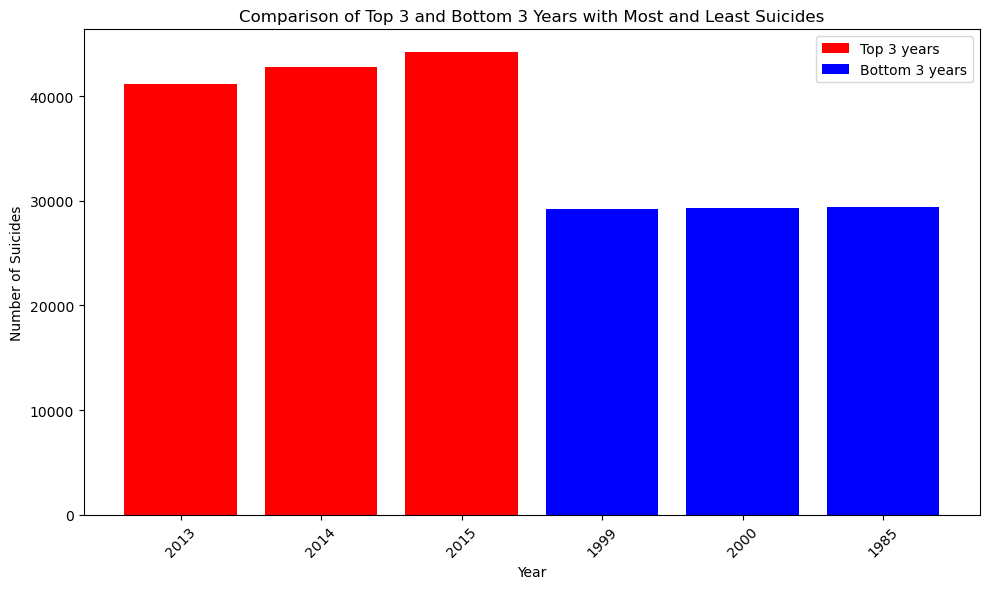

In [8]:
# Plotting the results of 3 tops and bottom suicides years
plt.figure(figsize=(10, 6))

# Plot the top 3 years with the most suicides
plt.bar(top_3_years.index.astype(str), top_3_years.values, color='red', label='Top 3 years')

# Plot the bottom 3 years with the least suicides
plt.bar(bottom_3_years.index.astype(str), bottom_3_years.values, color='blue', label='Bottom 3 years')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Comparison of Top 3 and Bottom 3 Years with Most and Least Suicides')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot as an image file
plt.savefig('suicides_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

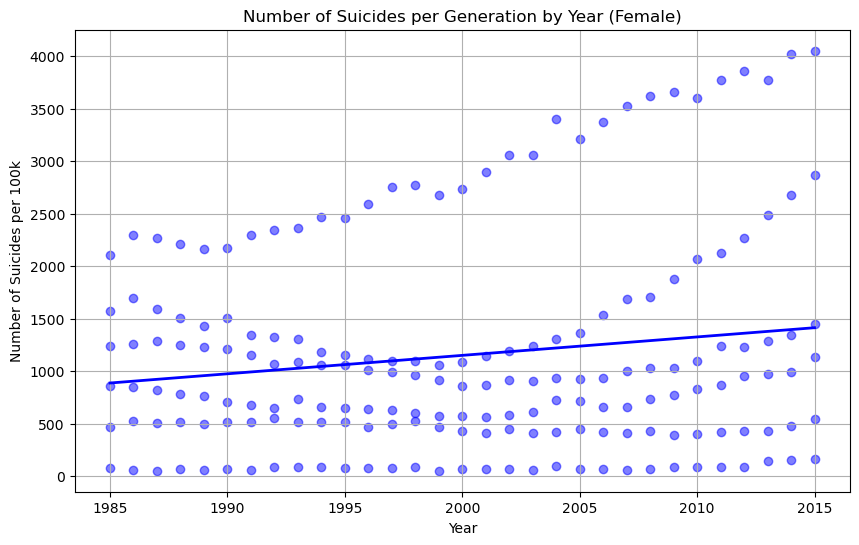

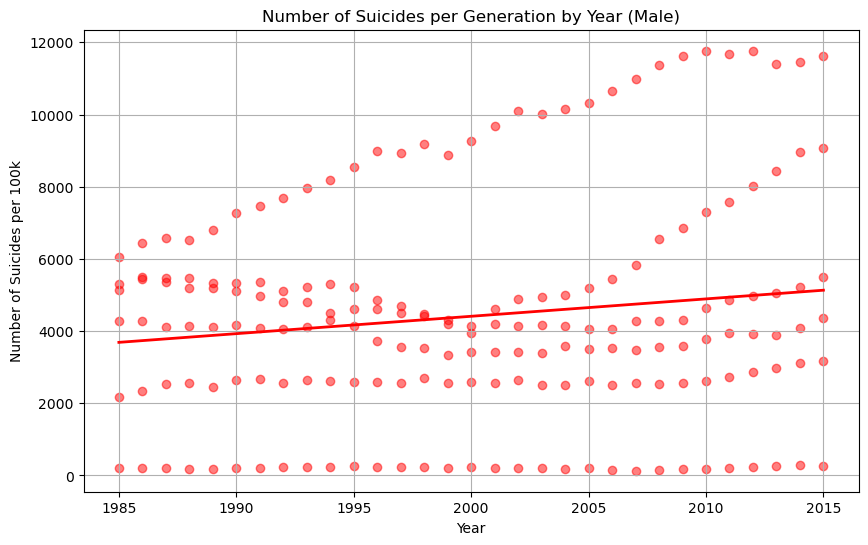

In [9]:
# scatter graph showing number of suicides by year sepaerating the females and males and adding the regression line

male_data = clean_data[clean_data['sex'] == 'male']
female_data = clean_data[clean_data['sex'] == 'female']

# Function to plot scatter plot with regression line
def plot_regression(data, color, title):
    X = data['year'].values.reshape(-1, 1)
    y = data['suicides_no'].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color=color, alpha=0.5)
    plt.plot(X, reg.predict(X), color=color, linestyle='-', linewidth=2)
    plt.title(title)
    #plt.legend(title=legend)
    plt.xlabel('Year')
    plt.ylabel('Number of Suicides per 100k')
    plt.grid(True)
    plt.savefig(title.replace(' ', '_') + '.png')  # Save plot with title as filename
    
    plt.show()
    
# Plot scatter graph with regression line for females and save it
plot_regression(female_data, color='blue', title='Number of Suicides per Generation by Year (Female)')

# Plot scatter graph with regression line for males and save it
plot_regression(male_data, color='red', title='Number of Suicides per Generation by Year (Male)')



In [10]:
# Filter the DataFrame to include only rows where the country is USA or 'United States' and the sex is 'male'
usa_male_data = clean_data[(clean_data['country'].isin(['USA', 'United States'])) & (clean_data['sex'] == 'male')]
usa_male_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,19693,Generation X


In [11]:
# Grouping by generation and calculating mean suicide rate
male_grouped = usa_male_data.groupby('generation')['suicides_no'].mean()
male_grouped

generation
Boomers            8091.882353
G.I. Generation    3298.545455
Generation X       4629.545455
Generation Z        206.444444
Millenials         2349.166667
Silent             4448.682927
Name: suicides_no, dtype: float64

In [12]:
# Filter the DataFrame to include only rows where the country is USA or 'United States' and the sex is 'female'
usa_female_data = clean_data[(clean_data['country'].isin(['USA', 'United States'])) & (clean_data['sex'] == 'female')]
usa_female_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,19693,Generation X


In [13]:
# Grouping by generation and calculating mean suicide rate
female_grouped = usa_female_data.groupby('generation')['suicides_no'].mean()
female_grouped

generation
Boomers            2339.352941
G.I. Generation     786.227273
Generation X       1136.454545
Generation Z        102.333333
Millenials          540.611111
Silent             1135.975610
Name: suicides_no, dtype: float64

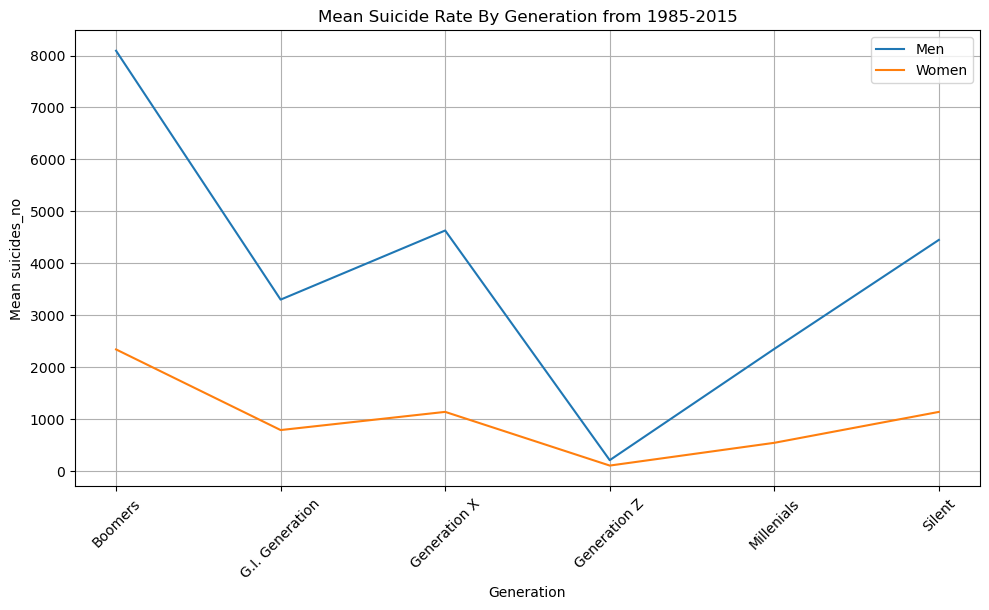

In [14]:
# Grouping data by sex to compare mean of female and male
male_data = clean_data[clean_data['sex'] == 'male']
female_data = clean_data[clean_data['sex'] == 'female']

# Grouping by generation and calculating mean suicide number for men and women
male_grouped = male_data.groupby('generation')['suicides_no'].mean()
female_grouped = female_data.groupby('generation')['suicides_no'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(male_grouped.index, male_grouped.values, label='Men')
plt.plot(female_grouped.index, female_grouped.values, label='Women')


plt.xlabel('Generation')
plt.ylabel('Mean suicides_no')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.title('Mean Suicide Rate By Generation from 1985-2015') 

# Show plot
plt.show()

# Next Data to read and analyze 

In [15]:
#using the file drugoverdose.csv
drug_overdose = pd.read_csv("drugoverdose.csv")
drug_overdose

,race_ethnicity,year,overdose_death_rate,overdose_death_count,population_size,data_as_of,data_loaded_at
0,All races,2022,78.5,635,808437,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
1,"Asian/Pacific Islander, Non-Hispanic/Latinx",2022,10.5,35,332462,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
2,"Black/African American, Non-Hispanic/Latinx",2022,399.7,166,41531,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
3,Hispanic/Latinx,2022,96.8,124,128162,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
4,"White, Non-Hispanic/Latinx",2022,84.6,259,306282,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
5,All races,2021,76.4,623,815201,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
6,"Asian/Pacific Islander, Non-Hispanic/Latinx",2021,7.8,26,334298,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
7,"Black/African American, Non-Hispanic/Latinx",2021,430.4,179,41592,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
8,Hispanic/Latinx,2021,78.9,101,128030,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
9,"White, Non-Hispanic/Latinx",2021,83.5,260,311281,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM


In [16]:
# Drop the specified columns
cleaned_drug_data = drug_overdose.drop(columns=["data_as_of", "data_loaded_at"])
cleaned_drug_data

,race_ethnicity,year,overdose_death_rate,overdose_death_count,population_size
0,All races,2022,78.5,635,808437
1,"Asian/Pacific Islander, Non-Hispanic/Latinx",2022,10.5,35,332462
2,"Black/African American, Non-Hispanic/Latinx",2022,399.7,166,41531
3,Hispanic/Latinx,2022,96.8,124,128162
4,"White, Non-Hispanic/Latinx",2022,84.6,259,306282
5,All races,2021,76.4,623,815201
6,"Asian/Pacific Islander, Non-Hispanic/Latinx",2021,7.8,26,334298
7,"Black/African American, Non-Hispanic/Latinx",2021,430.4,179,41592
8,Hispanic/Latinx,2021,78.9,101,128030
9,"White, Non-Hispanic/Latinx",2021,83.5,260,311281


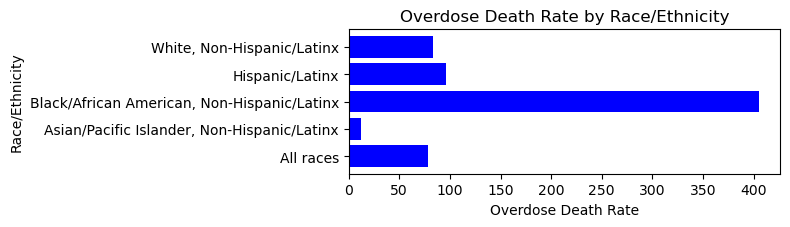

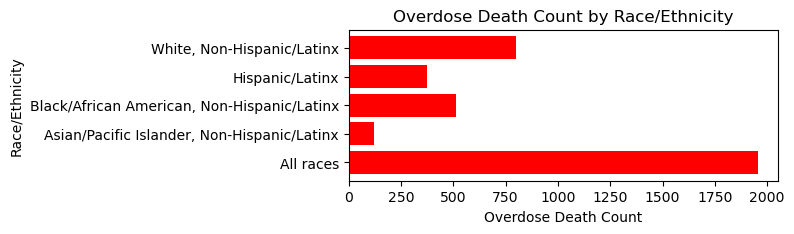

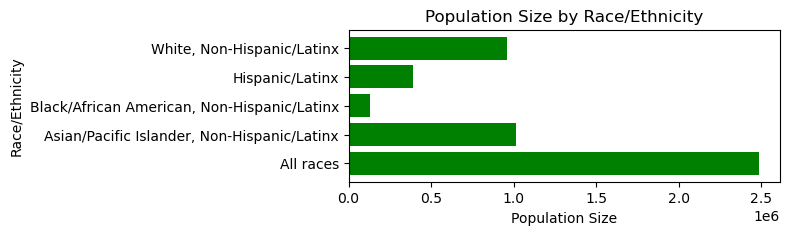

In [17]:
# comparing race/ethinicity to overdose rate, overdose death count and population size
# Grouping data by race/ethnicity
grouped_race = cleaned_drug_data.groupby('race_ethnicity').agg({
    'overdose_death_rate': 'mean',
    'overdose_death_count': 'sum',
    'population_size': 'sum'
}).reset_index()

# Loop through each subplot and save it
for i in range(1, 4):
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    plt.subplot(3, 1, i)  # Access each subplot
    if i == 1:
        plt.barh(grouped_race['race_ethnicity'], grouped_race['overdose_death_rate'], color='blue')
        plt.title('Overdose Death Rate by Race/Ethnicity')
        plt.xlabel('Overdose Death Rate')
        plt.ylabel('Race/Ethnicity')
    elif i == 2:
        plt.barh(grouped_race['race_ethnicity'], grouped_race['overdose_death_count'], color='red')
        plt.title('Overdose Death Count by Race/Ethnicity')
        plt.xlabel('Overdose Death Count')
        plt.ylabel('Race/Ethnicity')
    else:
        plt.barh(grouped_race['race_ethnicity'], grouped_race['population_size'], color='green')
        plt.title('Population Size by Race/Ethnicity')
        plt.xlabel('Population Size')
        plt.ylabel('Race/Ethnicity')
    plt.tight_layout()
    plt.savefig(f'plot_{i}.png')  # Save each plot as a separate image
    plt.show()  # Display each plot

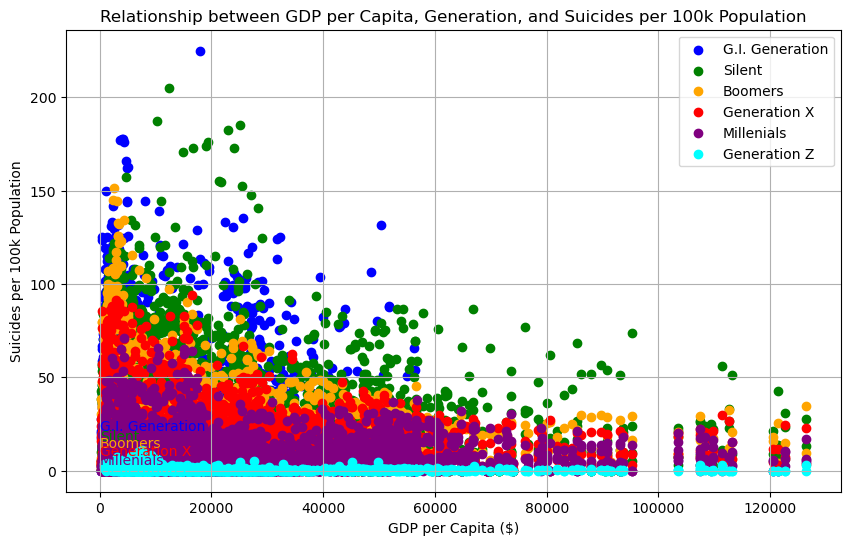

In [18]:
# Relationship between GDP per capita,Genertaion and suicides per 100k Populations
# Filter out rows with missing values
df = df.dropna(subset=['gdp_per_capita ($)', 'generation', 'suicides/100k pop'])

# Define colors for each generation
generation_colors = {
    'G.I. Generation': 'blue',
    'Silent': 'green',
    'Boomers': 'orange',
    'Generation X': 'red',
    'Millenials': 'purple',
    'Generation Z': 'cyan'
}

# Plot
plt.figure(figsize=(10, 6))
for generation, color in generation_colors.items():
    subset = df[df['generation'] == generation]
    plt.scatter(subset['gdp_per_capita ($)'], subset['suicides/100k pop'], c=color, label=generation)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.title('Relationship between GDP per Capita, Generation, and Suicides per 100k Population')
plt.grid(True)

# Add generation labels to the side
for generation, color in generation_colors.items():
    plt.text(0.95, df[df['generation'] == generation]['suicides/100k pop'].mean(), generation, color=color, fontsize=10, ha='left', va='center')

# Add legend
plt.legend()

# Save the plot as an image file
plt.savefig('gdp_generation_suicides_plot.png', dpi=300, bbox_inches='tight')

plt.show()

# Next Data to read and analyze 

In [19]:
#Read the file suicideaatempt.csv
suicide_data = Path("Project-one/suicideattempt.csv")
suicide_data

WindowsPath('Project-one/suicideattempt.csv')

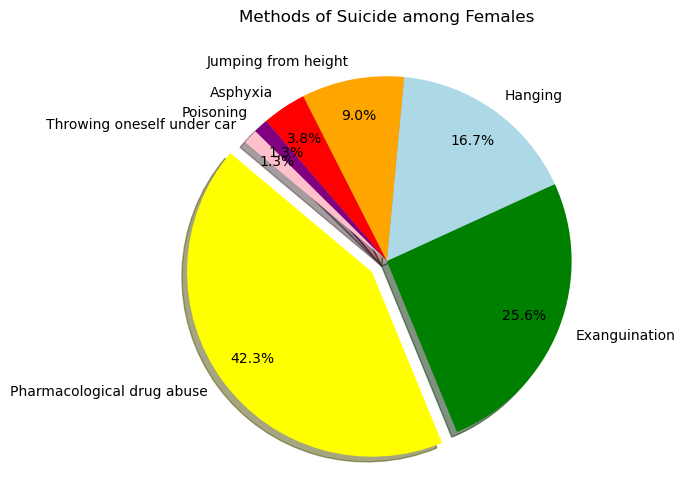

In [20]:
# Methods of suicides used by Females
labels = ['Pharmacological drug abuse', 'Exanguination', 'Hanging', 
          'Jumping from height', 'Asphyxia', 'Poisoning', 'Throwing oneself under car']
sizes = [99, 60, 39, 21, 9, 3, 3]
colors = ["yellow", "green", "lightblue", "orange", "red", "purple", "pink"]
explode = (0.1, 0, 0, 0, 0, 0, 0)  # Explode the first slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.8, labeldistance=1.1)

plt.title('Methods of Suicide among Females')

# Increase font size of labels
plt.rcParams['font.size'] = 10

# Save plot as PNG image
plt.savefig('methods_of_suicide_male.png', bbox_inches='tight')

# Show plot
plt.show()

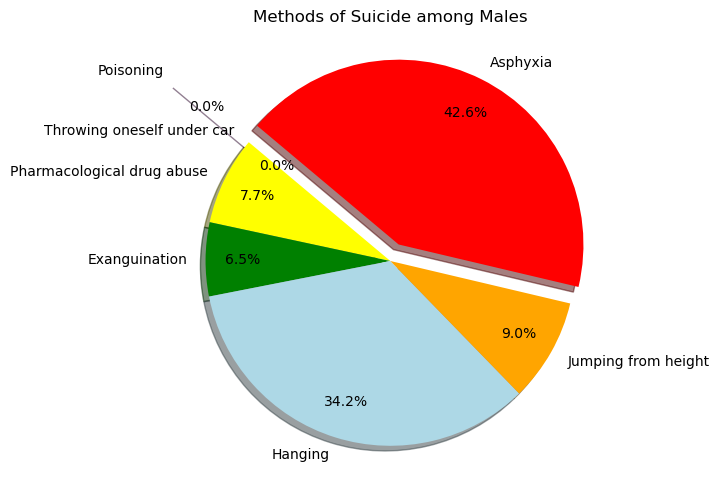

In [21]:
# Methods of suicides used by Males
labels_men = ['Pharmacological drug abuse', 'Exanguination', 'Hanging', 
              'Jumping from height', 'Asphyxia', 'Poisoning', 'Throwing oneself under car']
sizes_men = [12, 10, 53, 14, 66, 0, 0]
colors_men = ["yellow", "green", "lightblue", "orange", "red", "purple", "pink"]
explode = (0, 0, 0, 0, 0.1, 0.5, 0)  # Explode the first slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes_men, explode=explode, labels=labels_men, colors=colors_men,
        autopct="%1.1f%%", shadow=True, startangle=140, pctdistance=0.8, labeldistance=1.1)

plt.title('Methods of Suicide among Males')

# Increase font size of labels
plt.rcParams['font.size'] = 10
# Save plot as PNG image

plt.savefig('methods_of_suicide_females.png', bbox_inches='tight')

# Show plot
plt.show()

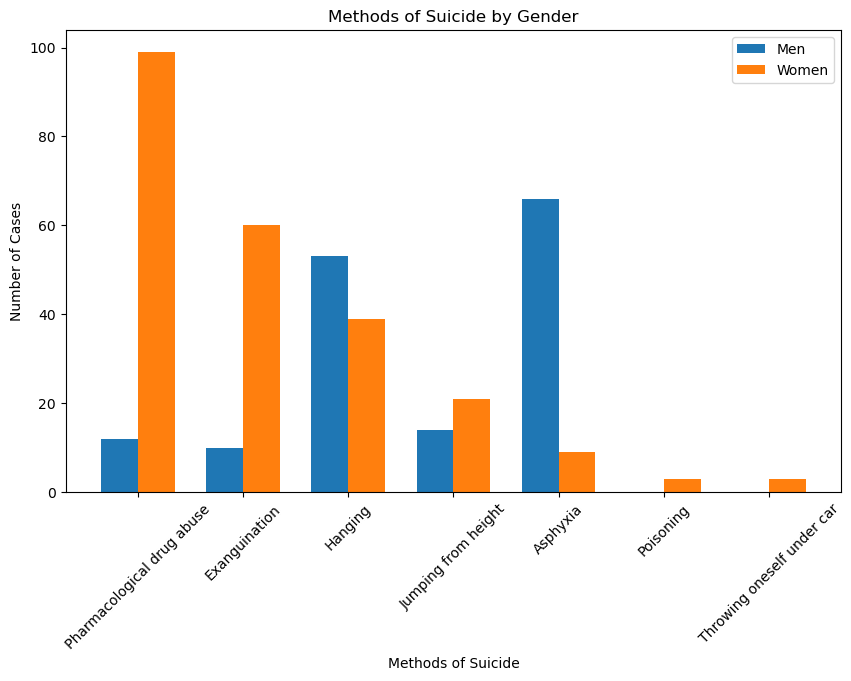

In [22]:
# Comparing the diffrrences methods of suicides used by females vs males

labels_men = ['Pharmacological drug abuse', 'Exanguination', 'Hanging', 
              'Jumping from height', 'Asphyxia', 'Poisoning', 'Throwing oneself under car']
sizes_men = [12, 10, 53, 14, 66, 0, 0]

# Data for females
sizes_women = [99, 60, 39, 21, 9, 3, 3]

x = np.arange(len(labels_men))  # the label locations
width = 0.35  # the width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, sizes_men, width, label='Men')
bars2 = ax.bar(x + width/2, sizes_women, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Methods of Suicide')
ax.set_ylabel('Number of Cases')
ax.set_title('Methods of Suicide by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels_men, rotation=45)
ax.legend()


In [23]:
# resources used
# https://stackoverflow.com/questions/18039057/pandas-parser-cparsererror-error-tokenizing-data 
# https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?resource=download
# https://github.com/matplotlib/matplotlib/issues/8998
# https://www.programiz.com/python-programming/methods/built-in/zip
# https://pandas.pydata.org/docs/reference/api/pandas.unique.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# https://pandas.pydata.org/docs/user_guide/groupby.html 
# https://stackoverflow.com/questions/34087382/matplotlib-center-text-in-its-bbox
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

#https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1/resource/e1d8e368-2a1b-488a-a7cc-6953439fc3af
#https://www.enterpriseappstoday.com/stats/suicide-statistics.html#Causes_of_Suicide
#Gender differentiation in methods of suicide attempts - PMC (nih.gov)
# https://www.ncbi.nlm.nih.gov/books/NBK441982/#article-34532.s15
# https://data.world/samhsa/serious-thoughts-of-suicide
# https://www.statista.com/statistics/1053024/lgbtq-youth-in-us-attempted-suicide-conversion-therapy-experience/
# https://catalog.data.gov/dataset/monthly-counts-of-deaths-by-select-causes-2014-2019-da9df
# https://www.ajpmonline.org/article/S0749-3797(18)31677-5/fulltext
# https://catalog.data.gov/dataset/unintentional-drug-overdose-death-rate-by-race-ethnicity
# https://ourworldindata.org/suicide
# https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
# https://catalog.data.gov/dataset/intimate-partner-homicide-suicide-in-new-york-city-2010-2018
# https://catalog.data.gov/dataset/early-model-based-provisional-estimates-of-drug-overdose-suicide-and-transportation-relate-b35b2
# https://www.cdc.gov/suicide/facts/disparities-in-suicide.html
